In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb, to_hex
import numpy as np
import cmath
import math
from random import randint
def transform(z,a=0.5,b=0.5,r=1):
    k1 = np.sqrt(r**2 - b**2) - a
    k2 = -np.sqrt(r**2 - b**2) - a
    if k1>r:
        k = k2
    else:
        k = k1
    # if z == 0 :
    #     return None
    # else:
    return  (z + k**2/z)
    

In [6]:
def slow_to_fast_growth(initial_value, max_value, max_iterations):
    array = []
    step = math.log(max_value/initial_value)/max_iterations
    for i in range(max_iterations):
        array.append(initial_value*math.exp(i*step))
    return array

In [7]:

def rand_col(min_v=0.1, max_v=0.7):
    hsv = np.concatenate([np.random.rand(2), np.random.uniform(min_v, max_v, size=1)])
    return to_hex(hsv_to_rgb(hsv))

In [8]:

def ploting(a=0.5,b=0.5,r=1, r_max = 2.5, rad_steps = 10,phi_steps = 10):
    fig, ax = plt.subplots(1, 2,figsize=(25, 25))
    color = []
    n =rad_steps

    for i in range(n):
        color.append(rand_col())
    #radiuses = np.linspace(r,r*2.5,rad_steps)
    radiuses = slow_to_fast_growth(r,r_max,rad_steps)
    angles = np.linspace(-np.pi,np.pi, phi_steps)
    phi_main_circle = np.linspace(-np.pi,np.pi, 100,endpoint=True)
    x = r*np.cos(phi_main_circle) - a 
    y = r*np.sin(phi_main_circle) + b
    z = x + 1j*y
    profile = np.apply_along_axis(transform,arr = z, axis = 0,a=a,b=b,r=r)
    X = profile.real
    Y = profile.imag
    ax[0].plot(x,y, 'black', linewidth = 2.5)
    ax[0].plot(-a,b,marker = '*',linestyle = 'none', color = 'red')
    ax[1].plot(X,Y, 'black', linewidth = 2.5)
    for c,rad in enumerate(radiuses): 
        line1x = []
        line1y = []
        line2x = []
        line2y = []
        for phi in angles: 
            x = rad*np.cos(phi) - a
            y = rad*np.sin(phi) + b
            ax[0].plot(x,y,marker = 'o', markersize = 1.3, linestyle = 'none',color = color[c])
            z_transform = transform(x+1j*y,a,b,r)
            ax[1].plot(z_transform.real, z_transform.imag,marker = 'o',markersize = 1.3, linestyle = 'none', color = color[c])
            line1x.append(x)
            line1y.append(y)
            line2x.append(z_transform.real)
            line2y.append(z_transform.imag)
        ax[0].plot(line1x,line1y,color = color[c],linewidth = 0.7)
        ax[1].plot(line2x,line2y,color = color[c],linewidth = 0.7)
    for phi in angles: 
        line1x = []
        line1y = []
        line2x = []
        line2y = []
        for rad in radiuses:
            x = rad*np.cos(phi) - a
            y = rad*np.sin(phi) + b
            z_transform = transform(x+1j*y,a,b,r)
            line1x.append(x)
            line1y.append(y)
            line2x.append(z_transform.real)
            line2y.append(z_transform.imag)
        ax[0].plot(line1x,line1y,color = 'black',linewidth = 0.7)
        ax[1].plot(line2x,line2y,color = 'black',linewidth = 0.7)
    ax[0].set_xlim([-r_max-0.5,r_max+0.5])
    ax[0].set_ylim([-r_max-0.5,r_max+0.5])
    ax[1].set_xlim([-r_max-0.5,r_max+0.5])
    ax[1].set_ylim([-r_max-0.5,r_max+0.5])
    ax[0].set(aspect='equal')
    ax[1].set(aspect = 'equal')
    ax[0].set_title(f'Circle with radius {r} and position at x = {-a}, y = {b}')
    ax[1].set_title('Joukowski transform grid')
    plt.savefig(f'images/Joukowskitransform{a,b,r}.png')
    # Customize the SVG output
    plt.rcParams['svg.fonttype'] = 'none'  # Prevent text rendering issues
    plt.rcParams['figure.dpi'] = 300  # High DPI for crisp SVG
    # Save as SVG
    plt.savefig(f'images/Joukowskitransform{a,b,r}.svg', format='svg')
    plt.show();
    



In [ ]:
ploting(a = 0.2,b = 0.2,r = 1,r_max = 3,rad_steps = 50, phi_steps=95)

In [16]:
def plot_main(a,b,r):
    fig, ax = plt.subplots()
    phi_main_circle = np.linspace(-np.pi,np.pi, 100,endpoint=True)
    x = r*np.cos(phi_main_circle) - a 
    y = r*np.sin(phi_main_circle) + b
    z = x + 1j*y
    profile = np.apply_along_axis(transform,arr = z, axis = 0,a=a,b=b,r=r)
    X = profile.real
    Y = profile.imag
    ax.plot(X,Y, 'black', linewidth = 2.5)
    ax.set(aspect='equal')
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2,2])
    plt.show();

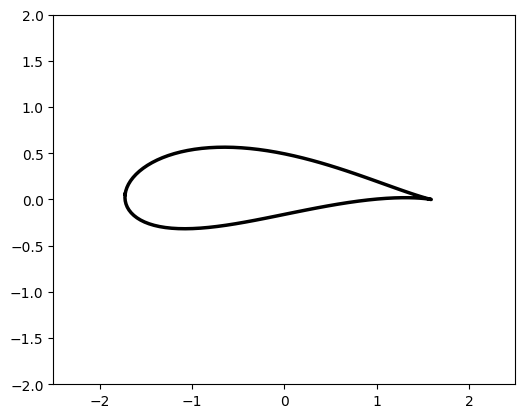

In [17]:
plot_main(a=0.2,b=0.1,r=1)

In [20]:
from ipywidgets import interact, FloatSlider

# Define the initial values
a = 0.2
b = 0.2

# Create a function to update the plot based on the slider values
def update_plot(a, b):
    plot_main(a,b,r=1)

# Create the interactive widgets
interact(update_plot, a=FloatSlider(min=-1, max=1, step=0.001, value=0.2), 
         b=FloatSlider(min=-1, max=1, step=0.001, value=0.2))

interactive(children=(FloatSlider(value=0.2, description='a', max=1.0, min=-1.0, step=0.001), FloatSlider(valu…

<function __main__.update_plot(a, b)>